# Análise de Dados: Poluição e Sintomas em Osasco

Este notebook integra dados de poluição atmosférica e sintomas reportados na cidade de Osasco, com o objetivo de investigar possíveis correlações entre eles. Serão utilizados gráficos, matrizes de correlação e outras visualizações para facilitar a análise.

In [1]:
#!pip install import-ipynb
#!pip install scikit-learn
#!pip install sklearn.preprocessing

### **Etapa 1: Importação de Bibliotecas e Dados**

Nesta primeira etapa, realizamos a importação das bibliotecas essenciais para análise e visualização de dados, além do carregamento dos conjuntos de dados principais que serão utilizados ao longo do projeto.

### **Bibliotecas Utilizadas:**

- **Pandas**: Para leitura, organização e manipulação de dados tabulares.
- **NumPy**: Para operações matemáticas e manipulação de arrays.
- **Matplotlib e Seaborn**: Para visualização gráfica dos dados, incluindo gráficos de dispersão, histogramas, mapas de calor, entre outros.
- **Scikit-learn (MinMaxScaler)**: Para normalização dos dados, deixando-os em uma mesma escala, o que facilita a análise comparativa e a preparação para modelos estatísticos ou de machine learning.
- **import_ipynb**: Utilizado para importar dados ou funções de outros notebooks .ipynb no ambiente do Google Colab.

### **Dados Carregados:**

Do módulo ou notebook **carregar**, foram importados dois DataFrames principais:

- **df_poluicao_cidade**: Contém informações sobre os níveis de poluição registrados em diferentes cidades.
- **df_cidade_sintomas**: Reúne dados sobre sintomas de saúde reportados nessas mesmas cidades.

Esses dados servirão como base para análises estatísticas, correlações e visualizações que permitirão compreender a possível relação entre a poluição atmosférica e o surgimento de sintomas ou problemas de saúde na população urbana.


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
import numpy as np
from carregar import df_poluicao_cidade, df_cidade_sintomas, df_empresas

<string>:1: DtypeWarning: Columns (15,53,91,93,175,178) have mixed types. Specify dtype option on import or set low_memory=False.


sintoma
DESC_RESP    1034
DISPNEIA      945
SATURACAO     932
FEBRE         710
TOSSE         548
FADIGA        137
VOMITO        118
DIARREIA       62
DOR_ABD        53
GARGANTA       42
PERD_PALA      26
PERD_OLFT      25
Name: qtd_casos, dtype: int64


### **Etapa 2: Exploração Inicial dos Dados**

Nesta etapa, foi realizada uma verificação das colunas disponíveis nos dois principais DataFrames. Isso ajuda a entender quais variáveis estão presentes e como os dados estão estruturados.

### **Objetivo**:

- **Listar as colunas** de cada DataFrame para obter uma visão geral das variáveis disponíveis e identificar possíveis chaves para junção ou análise cruzada.

### **Estrutura dos Dados**:

- **`df_poluicao_cidade`**: Apresenta variáveis relacionadas à qualidade do ar em diferentes cidades. Essas colunas provavelmente incluem informações como nome da cidade, data da medição, e concentrações de poluentes (como CO₂, PM2.5, NO₂, entre outros).

- **`df_cidade_sintomas`**: Contém registros sobre sintomas reportados por habitantes das cidades, como dificuldade respiratória, tosse, irritação nos olhos, entre outros indicadores de saúde.

Essa visualização inicial é fundamental para guiar as próximas etapas, como limpeza, análise estatística e correlação entre os dados de poluição e os sintomas observados.


In [3]:
print(df_poluicao_cidade.columns)
print(df_cidade_sintomas.columns)

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['DT_NOTIFIC', 'sintoma', 'qtd_casos'], dtype='object')


### **Etapa 3: Tratamento de Dados - Formatação de Colunas de Data**

Nesta etapa, realizamos o tratamento das colunas que contêm informações de data nos dois DataFrames. Esse processo é fundamental para garantir que as datas estejam em um formato padrão, o que facilita a manipulação e análise posterior.

### **Conversão de Colunas para o Formato de Data:**

- **Data de Poluição**: A coluna **'date'** do DataFrame **df_poluicao_cidade** foi convertida para o formato de data, considerando o padrão **dia/mês/ano**.
  
- **Data de Notificação de Sintomas**: A coluna **'DT_NOTIFIC'** do DataFrame **df_cidade_sintomas** também foi convertida para o formato de data, com o padrão **dia/mês/ano**.

### **Renomeação de Colunas:**

- A coluna **'date'** do DataFrame de poluição foi renomeada para **'data'**, garantindo consistência nos nomes das colunas de data em todo o projeto.
  
- A coluna **'DT_NOTIFIC'** do DataFrame de sintomas foi renomeada para **'data'**, permitindo uma maior facilidade de manipulação, especialmente quando for necessário realizar um **merge** entre os dois DataFrames, utilizando a coluna comum **'data'**.

Esses ajustes garantem que os dados de ambos os DataFrames possam ser combinados de maneira eficiente em análises posteriores.


In [4]:
# Converte a coluna 'date' do DataFrame de poluição para o formato de data, considerando o formato dia/mês/ano.
df_poluicao_cidade['date'] = pd.to_datetime(df_poluicao_cidade['date'], dayfirst=True)
# Converte a coluna 'DT_NOTIFIC' do DataFrame de sintomas também para o formato de data, considerando o formato dia/mês/ano.
df_cidade_sintomas['DT_NOTIFIC'] = pd.to_datetime(df_cidade_sintomas['DT_NOTIFIC'], dayfirst=True)

# Renomeia a coluna 'date' para 'data' no DataFrame de poluição, padronizando o nome da coluna de data.
df_poluicao_cidade = df_poluicao_cidade.rename(columns={'date': 'data'})
# Renomeia a coluna 'DT_NOTIFIC' para 'data' no DataFrame de sintomas, para permitir o merge com base em uma coluna comum.
df_cidade_sintomas = df_cidade_sintomas.rename(columns={'DT_NOTIFIC': 'data'})

### **Etapa 4: Junção dos DataFrames - Integração das Informações de Poluição e Sintomas**

Na etapa 4, realizamos a junção dos dois DataFrames **df_poluicao_cidade** e **df_cidade_sintomas**, com base na coluna **'data'**. Essa união é essencial para combinar as informações de poluição e sintomas registrados nas mesmas datas, permitindo uma análise mais integrada entre os dados.

### **Merge dos DataFrames:**

- O método **`pd.merge()`** foi utilizado para combinar os dois DataFrames, utilizando a coluna **'data'** como chave de junção.
- O parâmetro **`how='inner'`** foi especificado para garantir que apenas as datas presentes em ambos os DataFrames sejam consideradas, ou seja, mantendo apenas os registros onde tanto a poluição quanto os sintomas estão registrados.

### **Estrutura dos DataFrames Após o Merge:**

- **df_poluicao_cidade**: Contém informações sobre a poluição nas cidades.
- **df_cidade_sintomas**: Contém os dados dos sintomas registrados nas mesmas cidades.
- **df_completo**: Este novo DataFrame contém tanto as informações de poluição quanto as de sintomas, unidas pela coluna **'data'**.

Após a junção, é possível verificar a estrutura das colunas de cada DataFrame, proporcionando uma visão integrada dos dados, o que facilitará análises e visualizações posteriores.


In [5]:
# Realiza a junção (merge) dos dois DataFrames com base na coluna 'data',
# unindo as informações de poluição e sintomas registradas na mesma data.
df_completo = pd.merge(df_poluicao_cidade, df_cidade_sintomas, on='data', how='inner')
print(df_poluicao_cidade.columns)
print(df_cidade_sintomas.columns)
print(df_completo.columns)

Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')
Index(['data', 'sintoma', 'qtd_casos'], dtype='object')
Index(['data', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'sintoma',
       'qtd_casos'],
      dtype='object')


### **Etapa 5: Visualização do Novo DataFrame - df_completo**

Após realizar a junção dos DataFrames **df_poluicao_cidade** e **df_cidade_sintomas**, obtemos o novo DataFrame **df_completo**, que contém uma combinação de ambas as fontes de dados, agora relacionadas pela coluna **'data'**.

### **Estrutura do df_completo:**

Ao visualizar **df_completo**, podemos observar:

- As colunas que contêm informações sobre **poluição** e **sintomas** registrados nas **mesmas datas**.
- Cada linha representa um conjunto de dados em que a poluição e os sintomas ocorreram na mesma data, permitindo uma análise integrada da relação entre a poluição e os problemas de saúde reportados.

A visualização completa do **df_completo** permite uma visão consolidada e clara das informações, que podem ser usadas em análises estatísticas ou de machine learning para explorar correlações ou padrões entre os dois conjuntos de dados.


In [6]:
# Novo DataFrame
print(df_completo)

           data  pm25  pm10  o3  no2  so2  co    sintoma  qtd_casos
0    2024-01-01    33    20        7    1   2   DISPNEIA          1
1    2024-01-01    33    20        7    1   2  DESC_RESP          1
2    2024-01-01    33    20        7    1   2  SATURACAO          1
3    2024-01-02    54    18       12        3      TOSSE          1
4    2024-01-02    54    18       12        3  DESC_RESP          1
...         ...   ...   ...  ..  ...  ...  ..        ...        ...
1487 2024-12-30    43                              TOSSE          1
1488 2024-12-30    43                           DISPNEIA          3
1489 2024-12-30    43                          DESC_RESP          3
1490 2024-12-30    43                          SATURACAO          3
1491 2024-12-30    43                             FADIGA          1

[1492 rows x 9 columns]


### Tratando e normalizando as colunas

### **Etapa 6: Verificação do Tipo das Colunas**

Para garantir que as colunas do DataFrame **df_completo** estão no formato adequado para análise e manipulação, realizamos uma verificação dos tipos de dados de cada coluna. Essa etapa é fundamental para identificar se há necessidade de realizar conversões de tipos ou ajustes em colunas específicas, como datas ou valores numéricos.

### **Análise dos Tipos de Dados:**

Ao executar o comando **df_completo.dtypes**, podemos obter o tipo de cada coluna do DataFrame. Alguns tipos comuns incluem:

- **Objetos (Strings)**: Usados para armazenar textos ou categorias.
- **Inteiros e Flutuantes**: Para valores numéricos, como quantidades e medições.
- **Datetime**: Para colunas que representam datas, como **'data'**.

Verificar e ajustar os tipos de dados é uma parte importante da preparação de dados para análises estatísticas e modelos de machine learning.


In [7]:
# Verificar o tipo das colunas
print('Tipo das colunas \n', df_completo.dtypes)

Tipo das colunas 
 data         datetime64[ns]
 pm25                object
 pm10                object
 o3                  object
 no2                 object
 so2                 object
 co                  object
sintoma              object
qtd_casos             int64
dtype: object


### **Etapa 7: Limpeza de Dados - Remoção de Espaços Extras e Verificação de Valores Não Numéricos**

Na **Etapa 7**, iniciamos o processo de limpeza de dados para garantir que as análises e modelagens subsequentes não sejam impactadas por inconsistências nos dados.

#### **Remoção de Espaços Extras nos Nomes das Colunas:**

Para evitar problemas de leitura e manipulação de colunas devido a espaços indesejados, removemos os espaços extras do início e do final dos nomes das colunas. Isso é realizado com o comando **df_completo.columns.str.strip()**, que aplica a limpeza em todos os nomes de colunas.

#### **Verificação de Valores Não Numéricos (NaN):**

Em seguida, verificamos a quantidade de valores ausentes ou **NaN (Not a Number)** nas colunas selecionadas, que incluem variáveis relacionadas à poluição do ar (**pm25**, **pm10**, **no2**, etc.) e sintomas de saúde da população urbana.

A função **isna().sum()** permite contar quantos valores ausentes existem em cada coluna. A identificação de valores ausentes é essencial para decidir se será necessário realizar imputação (substituição) ou remoção de dados faltantes, dependendo da análise que será realizada.


In [8]:
# Remover espaços extras nos nomes das colunas
df_completo.columns = df_completo.columns.str.strip()

# Verificar o número de valores não numéricos (NaN) em cada coluna
print('Valores não numéricos em cada coluna: \n', df_completo[['pm25', 'pm10','no2', 'so2', 'co', 'sintoma']].isna().sum())

Valores não numéricos em cada coluna: 
 pm25       0
pm10       0
no2        0
so2        0
co         0
sintoma    0
dtype: int64


### **Etapa 8: Limpeza de Dados e Normalização**

Na **Etapa 8**, continuamos o processo de limpeza e transformação dos dados para garantir que estejam prontos para análise. As etapas incluem a exclusão de colunas irrelevantes, o tratamento de valores ausentes e a normalização das variáveis numéricas.

#### **Exclusão de Colunas com Pouca Influência:**

Removemos a coluna **'o3'** e pois foi identificada como pouco relevantes para a análise de poluição e sintomas. A exclusão de colunas desnecessárias ajuda a simplificar o conjunto de dados, além de reduzir o tempo de processamento.

#### **Substituição de Strings Vazias ou Espaços por NaN:**

Substituímos qualquer string vazia ou espaços em branco nas colunas de poluição (**pm25**, **pm10**, **no2**, **so2**, **co**) por **NaN**. Isso garante que valores inválidos ou ausentes sejam corretamente reconhecidos como dados faltantes, permitindo um tratamento adequado posterior.

#### **Conversão para Tipo Numérico e Tratamento de Valores Inválidos:**

Tentamos converter as colunas de poluição (**pm25**, **pm10**, **no2**, **so2**, **co**) para valores numéricos. Se algum valor não puder ser convertido (por exemplo, se for uma string ou um valor inválido), ele será forçado a **NaN**. Essa transformação é crucial para evitar erros em análises estatísticas ou de machine learning que requerem variáveis numéricas.

#### **Preenchimento de Valores Faltantes com a Média:**

Para lidar com os valores ausentes (**NaN**), preenchemos os dados faltantes nas colunas de poluição e sintomas com a **média** de cada coluna. Isso é feito para manter a integridade dos dados e evitar que a análise seja prejudicada pela ausência de informações.

#### **Normalização dos Dados:**

Por fim, normalizamos as variáveis numéricas para garantir que todas as colunas fiquem na mesma escala. Isso é feito utilizando o **MinMaxScaler**, que ajusta os valores para o intervalo [0, 1]. A normalização é uma etapa importante para preparar os dados para modelos de machine learning, onde a escala das variáveis pode afetar a performance dos algoritmos.

Essa etapa é fundamental para garantir que os dados estejam prontos para análise e modelagem estatística, com valores consistentes e dentro da escala adequada.


In [9]:
# 1. Exclui coluna de pouca influência
if 'o3' in df_completo.columns:
    df_completo.drop(columns=['o3'], inplace=True)

# 2. Converte poluentes para numérico, trata strings vazias
poluentes = ['pm25', 'pm10', 'no2', 'so2', 'co']
df_completo[poluentes] = df_completo[poluentes].replace(r'^\s*$', np.nan, regex=True)
df_completo[poluentes] = df_completo[poluentes].apply(pd.to_numeric, errors='coerce')
df_completo[poluentes] = df_completo[poluentes].fillna(df_completo[poluentes].mean())

# 3. Transforma sintomas em colunas binárias se necessário
if 'sintoma' in df_completo.columns and 'qtd_casos' in df_completo.columns:
    df_completo['presente'] = (df_completo['qtd_casos'] > 0).astype(int)
    df_sintomas_bin = df_completo.pivot_table(
        index='data', columns='sintoma', values='presente', aggfunc='max', fill_value=0
    ).reset_index()

    # Junta com os dados de poluição (evita duplicatas)
    df_pol = df_completo[['data'] + poluentes].drop_duplicates()
    df_completo = pd.merge(df_pol, df_sintomas_bin, on='data', how='inner')

# 4. Normalização: cria df_normalizado com todas as colunas numéricas normalizadas
colunas_para_normalizar = df_completo.columns.difference(['data'])
scaler = MinMaxScaler()
df_normalizado = df_completo.copy()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(df_normalizado[colunas_para_normalizar])


### **Etapa 9: Visualização do Resultado**

Nesta **Etapa 9**, visualizamos o DataFrame após a normalização dos dados. A visualização é uma parte crucial do processo, pois nos permite inspecionar os dados finalizados e verificar se as transformações realizadas foram aplicadas corretamente.

#### **Visualização do DataFrame Normalizado:**

A função **`display(df_normalizado)`** exibe o DataFrame resultante, mostrando os dados de poluição e sintomas já tratados, com as colunas normalizadas. Isso nos permite inspecionar visualmente os valores ajustados e garantir que a normalização foi realizada com sucesso.

Ao visualizar o DataFrame, podemos verificar se as variáveis estão no intervalo correto de [0, 1], como esperado após a normalização. Além disso, podemos inspecionar se as colunas relacionadas à poluição e aos sintomas estão consistentes, com valores numéricos e sem dados ausentes.


In [10]:
# Visualiza o resultado
display(df_normalizado)

,data,pm25,pm10,no2,so2,co,DESC_RESP,DIARREIA,DISPNEIA,DOR_ABD,FADIGA,FEBRE,GARGANTA,PERD_OLFT,PERD_PALA,SATURACAO,TOSSE,VOMITO
0,2024-01-01,0.151515,0.178082,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2024-01-02,0.310606,0.150685,0.121951,0.028824,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2024-01-03,0.310606,0.164384,0.121951,0.028824,0.133333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2024-01-04,0.181818,0.041096,0.000000,0.028824,0.066667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,2024-01-05,0.053030,0.082192,0.073171,0.028824,0.133333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2024-12-26,0.227273,0.095890,0.219512,0.028824,0.200000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
266,2024-12-27,0.234848,0.150685,0.292683,0.028824,0.266667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
267,2024-12-28,0.219697,0.164384,0.219512,0.028824,0.200000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
268,2024-12-29,0.310606,0.068493,0.121951,0.028824,0.066667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# Análise Gráfica dos Dados

### Mapa de Calor - Correlação entre Sintomas

Este gráfico mostra a força e direção das correlações entre os diferentes sintomas registrados.

Cores mais quentes (vermelho) indicam correlações positivas mais fortes, enquanto cores mais frias (azul) indicam correlações negativas.

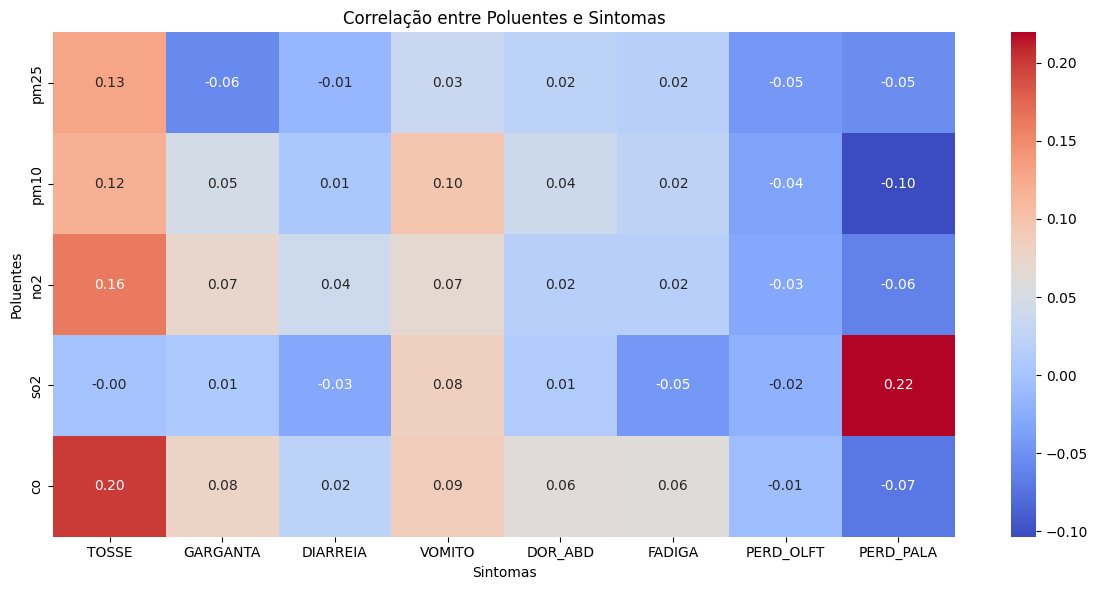

In [11]:
# Poluentes e sintomas
colunas_poluentes = ['pm25', 'pm10', 'no2', 'so2', 'co']
colunas_sintomas = ['TOSSE', 'GARGANTA', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']

# Subset do dataframe apenas com os dados relevantes
df_corr = df_normalizado[colunas_poluentes + colunas_sintomas]

# Calcula a correlação entre sintomas e poluentes
correlacoes = df_corr[colunas_sintomas].corrwith(df_corr[colunas_poluentes], axis=0)

# Matriz de correlação completa entre sintomas e poluentes
matriz_correlacao = df_corr[colunas_sintomas].corrwith(df_corr[colunas_poluentes], axis=1)

# Para uma visualização cruzada (poluentes x sintomas):
matriz_cross = df_corr[colunas_poluentes].T.corrwith(df_corr[colunas_sintomas], axis=1)
matriz = df_corr[colunas_poluentes + colunas_sintomas].corr().loc[colunas_poluentes, colunas_sintomas]

# Plotar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Poluentes e Sintomas')
plt.ylabel('Poluentes')
plt.xlabel('Sintomas')
plt.tight_layout()
plt.show()

## Análise temporal

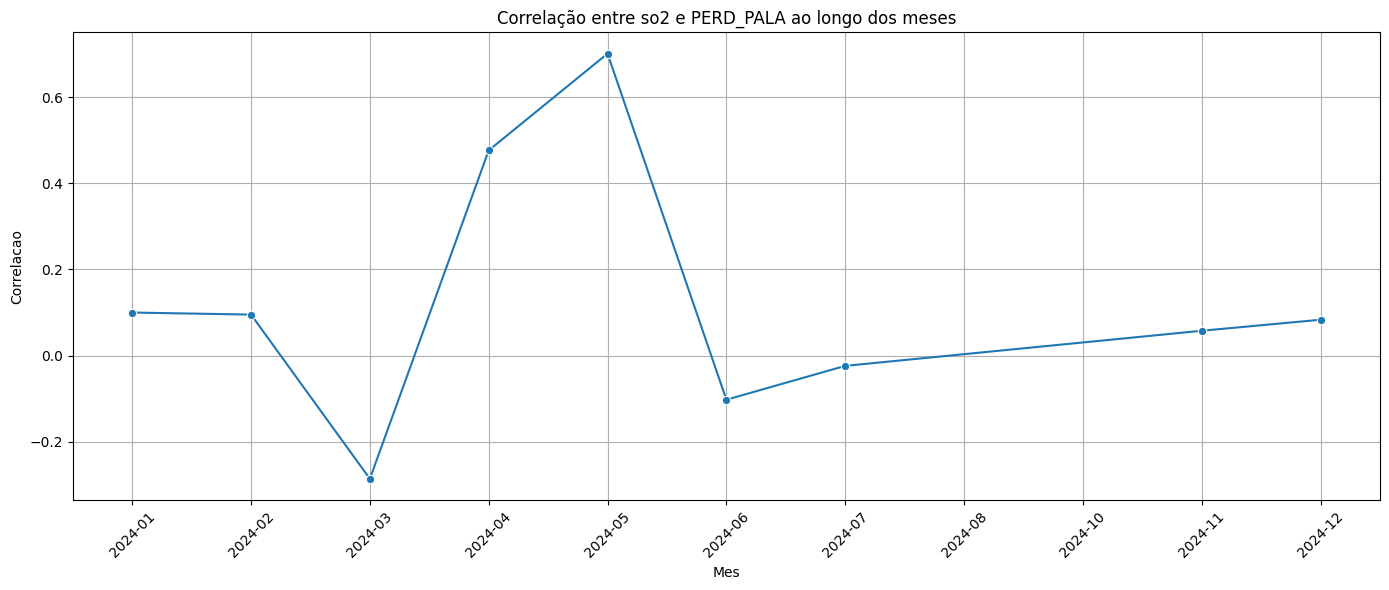

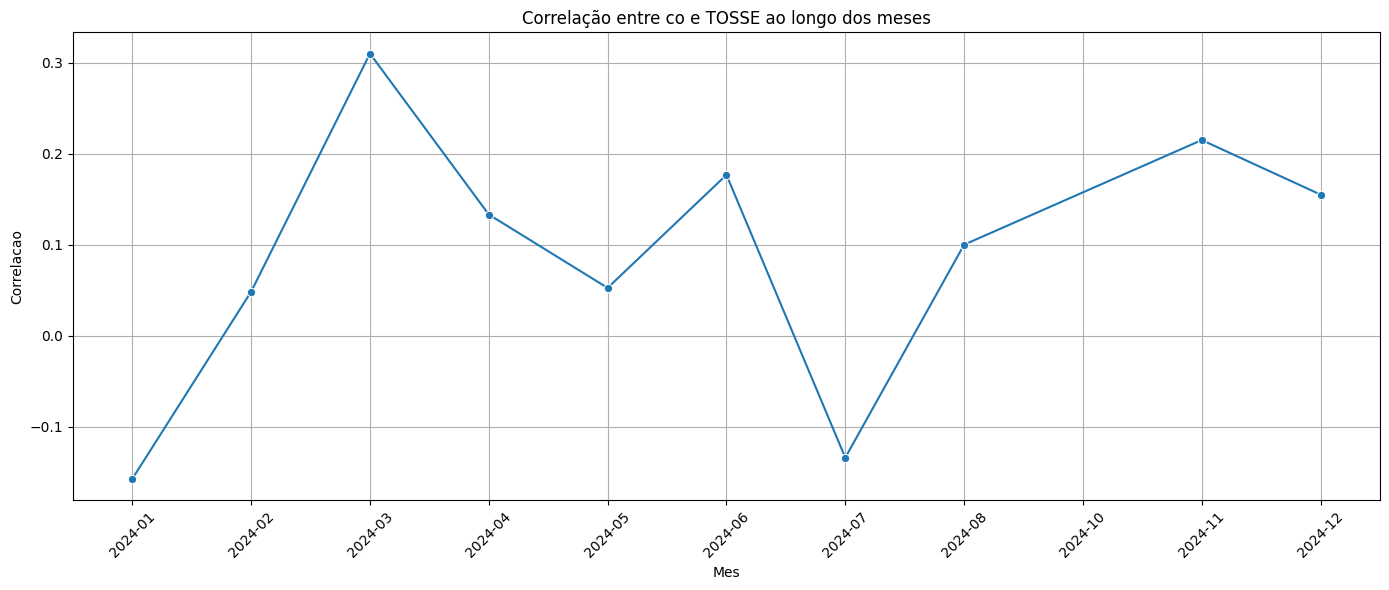

In [12]:
# Converte a coluna de data (ajuste se o nome for diferente)
df_normalizado['data'] = pd.to_datetime(df_normalizado['data'])
df_normalizado['mes'] = df_normalizado['data'].dt.to_period('M').astype(str)

# DataFrame para armazenar os resultados
correlacoes = []

# Itera por cada mês
for mes, grupo in df_normalizado.groupby('mes'):
    matriz = grupo[colunas_poluentes + colunas_sintomas].corr()
    for poluente in colunas_poluentes:
        for sintoma in colunas_sintomas:
            corr = matriz.loc[poluente, sintoma]
            correlacoes.append({
                'Mes': mes,
                'Poluente': poluente,
                'Sintoma': sintoma,
                'Correlacao': corr
            })

# Converte em DataFrame
df_corr = pd.DataFrame(correlacoes)

poluente_analisado = 'so2'

# Para múltiplos sintomas
for sintoma in ['PERD_PALA']:  # Lista de sintomas
    df_corr_filtrado = df_corr[(df_corr['Poluente'] == poluente_analisado) & (df_corr['Sintoma'] == sintoma)]
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_corr_filtrado, x='Mes', y='Correlacao', marker='o')
    plt.title(f'Correlação entre {poluente_analisado} e {sintoma} ao longo dos meses')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

poluente_analisado = 'co'

# Para múltiplos sintomas
for sintoma in ['TOSSE']:  # Lista de sintomas
    df_corr_filtrado = df_corr[(df_corr['Poluente'] == poluente_analisado) & (df_corr['Sintoma'] == sintoma)]
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_corr_filtrado, x='Mes', y='Correlacao', marker='o')
    plt.title(f'Correlação entre {poluente_analisado} e {sintoma} ao longo dos meses')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Evolução dos Sintomas ao Longo do Tempo (Semanal)

Este gráfico mostra como os casos de sintomas evoluíram ao longo do tempo, com uma agregação semanal.

Ajuda a identificar tendências, surtos ou períodos de alta notificação de sintomas.

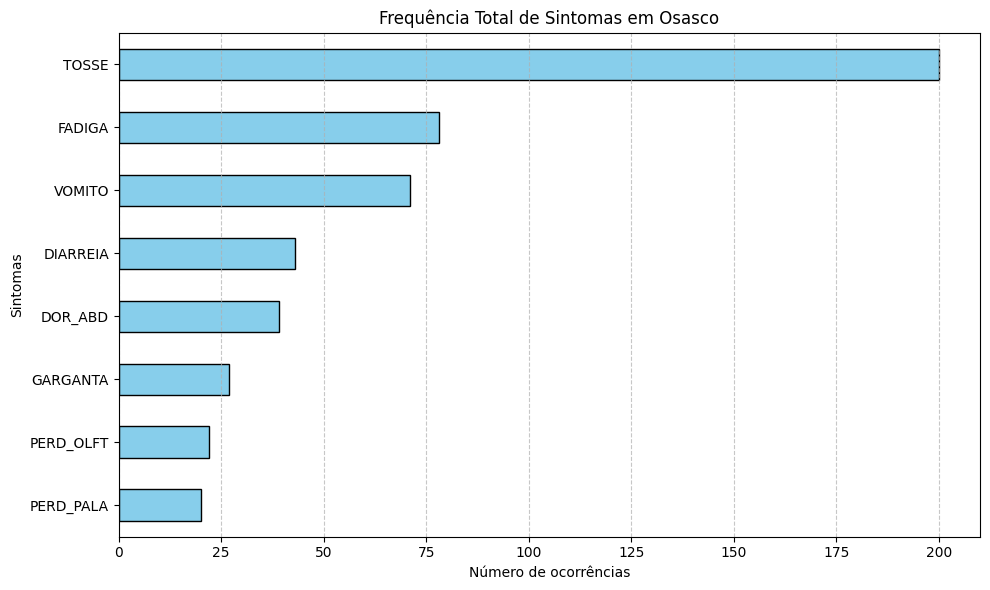

In [13]:
import matplotlib.pyplot as plt

# Soma total dos sintomas ao longo do tempo
sintomas_totais = df_completo[colunas_sintomas].sum().sort_values(ascending=True)

# Plotando
plt.figure(figsize=(10, 6))
sintomas_totais.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Frequência Total de Sintomas em Osasco")
plt.xlabel("Número de ocorrências")
plt.ylabel("Sintomas")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


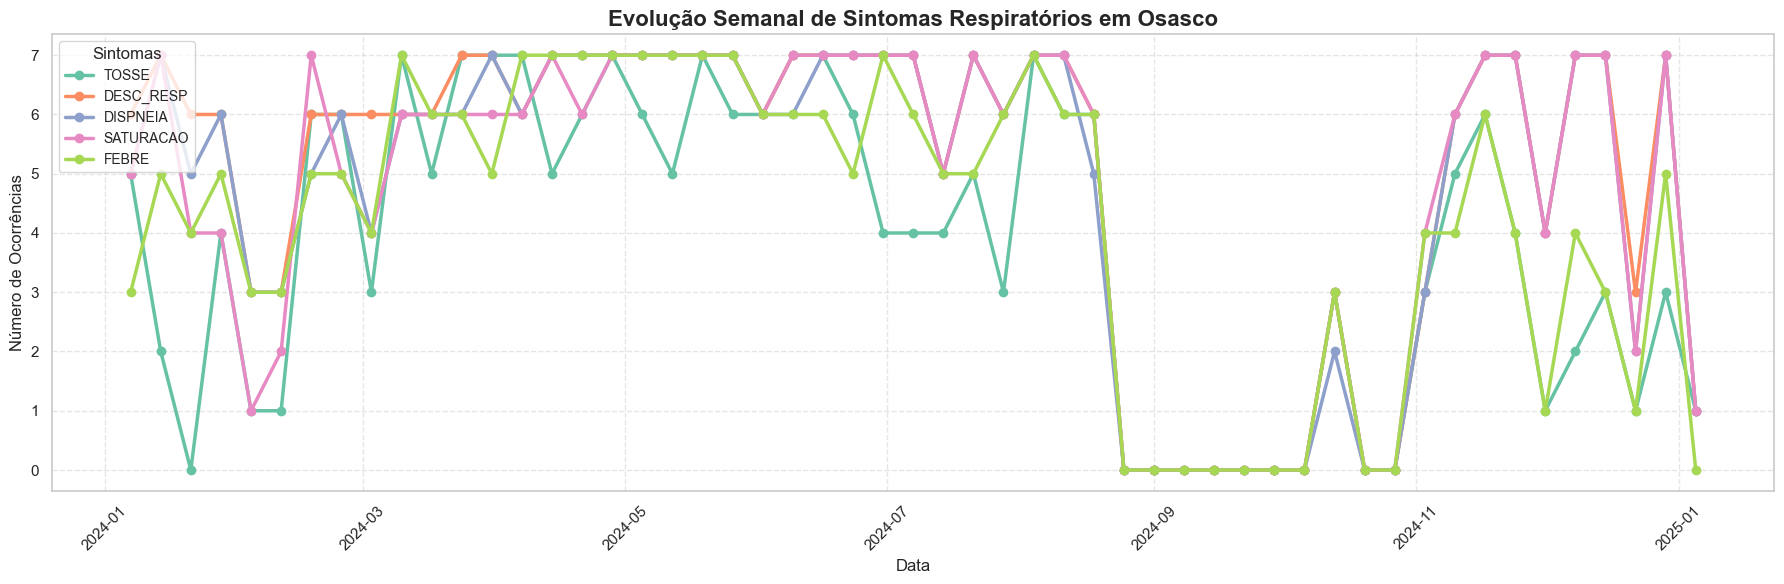

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual mais bonito e consistente
sns.set(style="whitegrid", palette="Set2")

# Conversão de datas (caso ainda não tenha sido feita)
df_completo['data'] = pd.to_datetime(df_completo['data'])

# Resample semanal dos sintomas de interesse
sintomas_foco = ['TOSSE', 'DESC_RESP', 'DISPNEIA', 'SATURACAO', 'FEBRE']
df_sintomas_tempo = df_completo.set_index('data')[sintomas_foco].resample('W').sum()

# Plot aprimorado
plt.figure(figsize=(18, 6))
for sintoma in sintomas_foco:
    plt.plot(df_sintomas_tempo.index, df_sintomas_tempo[sintoma],
             label=sintoma, linewidth=2.5, marker='o')

plt.title("Evolução Semanal de Sintomas Respiratórios em Osasco", fontsize=16, weight='bold')
plt.xlabel("Data", fontsize=12)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sintomas", loc="upper left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Concentração Média dos Poluentes em Osasco

Este gráfico mostra a concentração média dos principais poluentes atmosféricos registrados em Osasco.

Cada barra representa a média de um tipo de poluente ao longo do período analisado.

Esse tipo de visualização é essencial para identificar quais poluentes estão mais presentes
na atmosfera local e quais podem ter maior impacto sobre a saúde pública.


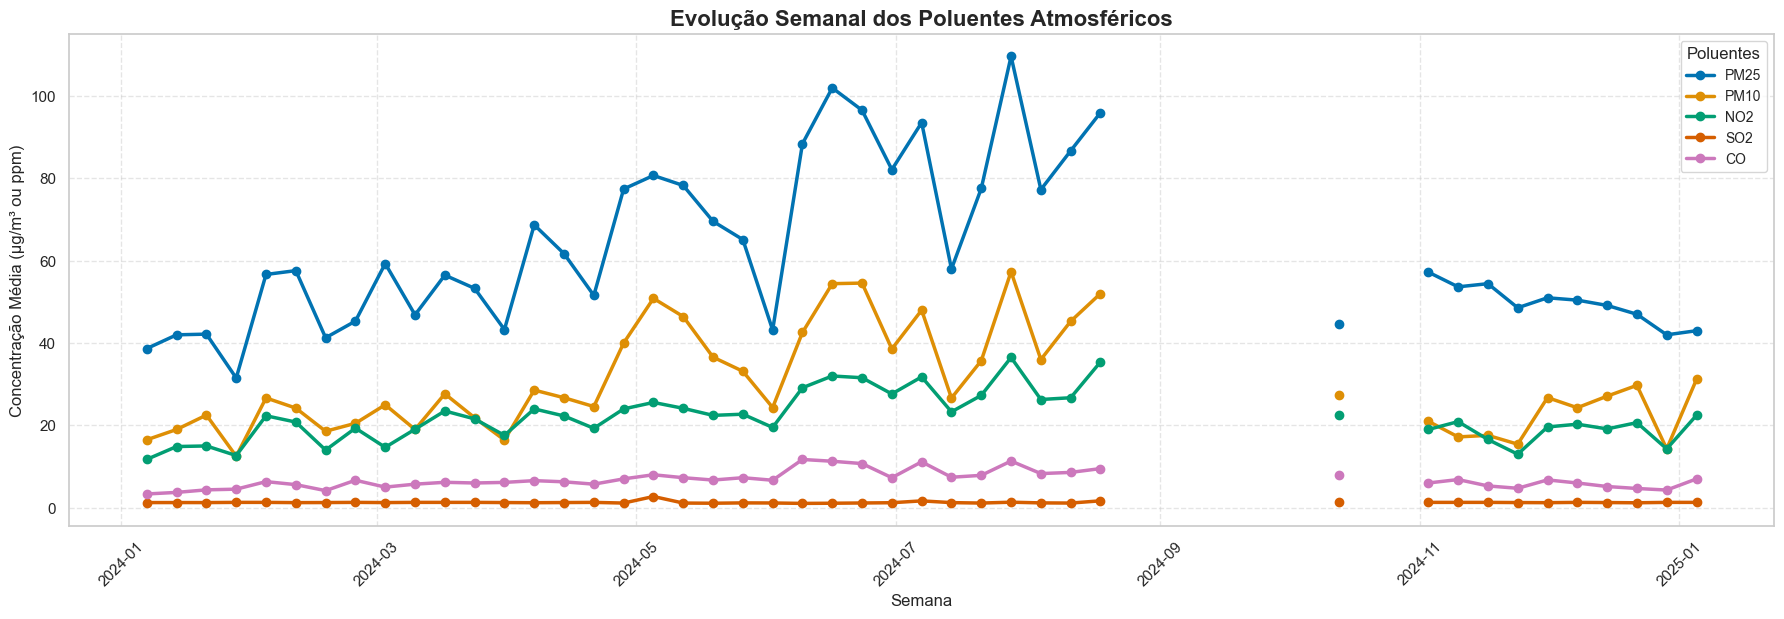

In [15]:
# Padroniza nomes de colunas (remove espaços extras)
df_completo.columns = df_completo.columns.str.strip().str.lower()

# Lista de poluentes
poluentes = ['pm25', 'pm10', 'no2', 'so2', 'co']

# Garante que 'data' esteja em formato datetime
df_completo['data'] = pd.to_datetime(df_completo['data'])

# Agrupa por semana e calcula média dos poluentes
df_poluentes_tempo = df_completo.set_index('data')[poluentes].resample('W').mean()

# Estilo visual
sns.set(style="whitegrid", palette="colorblind")

# Plot
plt.figure(figsize=(18, 6))
for poluente in poluentes:
    plt.plot(df_poluentes_tempo.index, df_poluentes_tempo[poluente],
             label=poluente.upper(), linewidth=2.5, marker='o')

plt.title("Evolução Semanal dos Poluentes Atmosféricos", fontsize=16, weight='bold')
plt.xlabel("Semana")
plt.ylabel("Concentração Média (μg/m³ ou ppm)")
plt.legend(title="Poluentes", loc="upper right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Correlação com as empresas

In [16]:
df_empresas = pd.DataFrame({
    'empresa': ['CERVIFLAN INDUSTRIAL', 'CONTINENTAL BRASIL AUTOMOTIVA', 'DANFLOW INDUSTRIAL', 
                'DEGANI VADUZ QUÍMICA', 'ELETRICA DANUBIO', 'GARRETT MOTION AUTOMOTIVA', 
                'HITACHI ENERGY BRASIL', 'MAGGION PNEUS', 'PANDURATA ALIMENTOS', 
                'ROSSETTI EQUIPAMENTOS RODOVIÁRIOS'],
    'setor': ['Metalurgia', 'Automotivo', 'Indústria Química', 'Indústria Química', 'Eletroeletrônica',
              'Automotivo', 'Eletroeletrônica', 'Pneus', 'Alimentos', 'Equipamentos Rodoviários'],
    'poluentes': [
        ['pm2.5', 'pm10', 'co'], 
        ['pm2.5', 'pm10', 'no2', 'co'], 
        ['pm10', 'co'], 
        ['pm2.5', 'so2', 'co', 'no2'], 
        ['pm10', 'co', 'no2'], 
        ['pm2.5', 'pm10', 'co', 'no2'], 
        ['pm2.5', 'pm10', 'so2'], 
        ['pm2.5', 'pm10', 'co', 'so2'], 
        ['pm10', 'co'], 
        ['pm10', 'co', 'no2']
    ]
})

# Definindo os poluentes
colunas_poluentes = ['pm25', 'pm10', 'no2', 'so2', 'co']

# Função para verificar quais poluentes a empresa emite
def check_poluente(poluentes, poluente):
    return 1 if poluente in poluentes else 0

# Criando as colunas de poluentes no DataFrame
for poluente in colunas_poluentes:
    df_empresas[poluente] = df_empresas['poluentes'].apply(lambda x: check_poluente(x, poluente))

# Removendo a coluna de 'poluentes' pois ela não é mais necessária
df_empresas = df_empresas.drop('poluentes', axis=1)

df_empresas

,empresa,setor,pm25,pm10,no2,so2,co
0,CERVIFLAN INDUSTRIAL,Metalurgia,0,1,0,0,1
1,CONTINENTAL BRASIL AUTOMOTIVA,Automotivo,0,1,1,0,1
2,DANFLOW INDUSTRIAL,Indústria Química,0,1,0,0,1
3,DEGANI VADUZ QUÍMICA,Indústria Química,0,0,1,1,1
4,ELETRICA DANUBIO,Eletroeletrônica,0,1,1,0,1
5,GARRETT MOTION AUTOMOTIVA,Automotivo,0,1,1,0,1
6,HITACHI ENERGY BRASIL,Eletroeletrônica,0,1,0,1,0
7,MAGGION PNEUS,Pneus,0,1,0,1,1
8,PANDURATA ALIMENTOS,Alimentos,0,1,0,0,1
9,ROSSETTI EQUIPAMENTOS RODOVIÁRIOS,Equipamentos Rodoviários,0,1,1,0,1


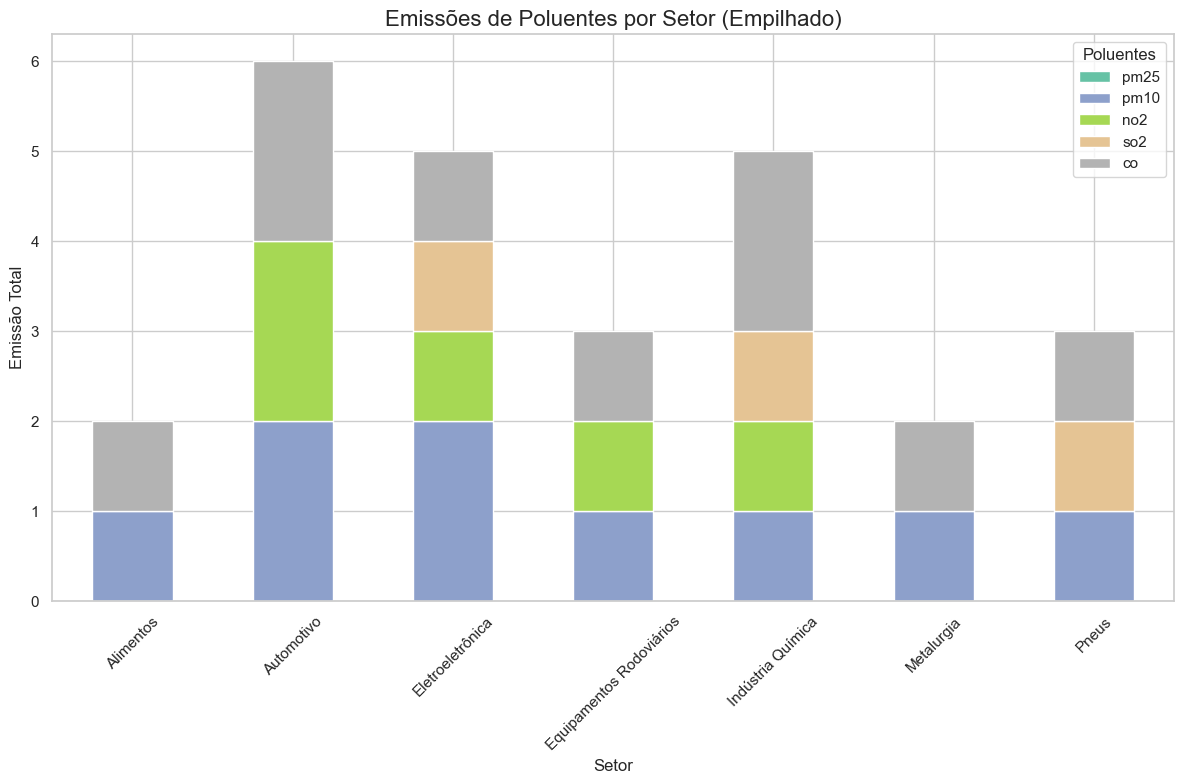

In [17]:
# Filtrando as colunas necessárias
df_poluentes = df_empresas[['setor'] + colunas_poluentes]

# Agrupando e somando as emissões por setor
df_grouped = df_poluentes.groupby('setor')[colunas_poluentes].sum()

# Plotando gráfico de barras empilhadas
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')

# Títulos e ajustes
plt.title('Emissões de Poluentes por Setor (Empilhado)', fontsize=16)
plt.xlabel('Setor', fontsize=12)
plt.ylabel('Emissão Total', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Poluentes')

# Exibir gráfico
plt.tight_layout()
plt.show()
